In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [3]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x:x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x:x):
    x_range, f = X
    mean = E(X,g)
    def integrand(x):
        return (g(x)-mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min>=0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected value {E(X): .3f}')
    print(f'variance {V(X) : .3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')
    ax.legend()
    plt.show()

1. 정규분포

In [4]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x-mu)**2 / (2 * sigma**2))
    
    return x_range, f

In [6]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

check_prob(X)

expected value  2.000
variance  0.250


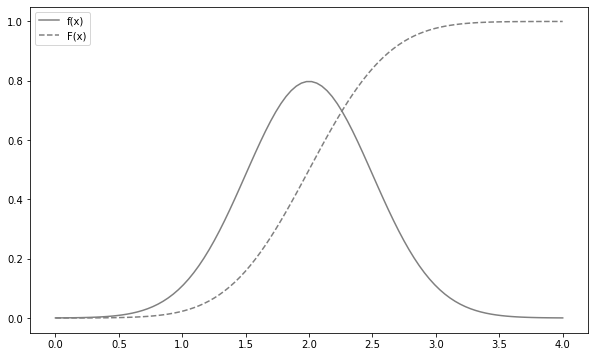

In [7]:
# 밀도함수와 분포함수를 0과 4사이의 구간에서 그림

plot_prob(X, 0, 4)

In [8]:
# 기댓값이 2이고 표준편차가 0.5ㅇ인 정규분포를 따르는 확률변수 생성

rv = stats.norm(2, 0.5)

In [10]:
rv.mean(), rv.var()

(2.000, 0.250)

In [11]:
# 밀도함수
rv.pdf(2)

0.798

In [12]:
# X가 1.7보다 작은 값이 될 확률

rv.cdf(1.7)

0.274

In [13]:
# 상위 30%의 점
rv.isf(0.3)

2.262

In [14]:
# 90% 구간
rv.interval(0.9)

(1.178, 2.822)

In [15]:
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

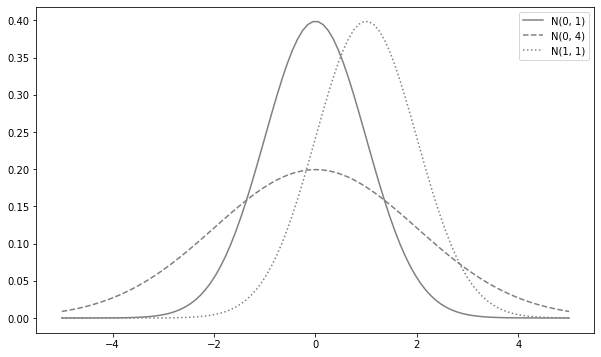

In [17]:
# 파라미터에 따라 정규분포의 형태가 어떻게 변화하는지
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0,1), (0,2), (1,1)]
for param, ls in zip(params, linestyles):
    mu, sigma=param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label = f'N({mu}, {sigma**2})', ls=ls, color='gray')
    
ax.legend()

plt.show()

sigma가 커짐에 따라 분포가 넓어지고, mu가 변화하면 분포전체가 평행이동

2. 지수분포 : 어떤 사건이 발생하는 간격이 따르는 분포

In [21]:
def Ex(lam):
    x_range = [0, np.inf]
    
    def f(x):
        if x>=0:
            return lam * np.exp(-lam * x)
        else:
            return 0
        
    return x_range, f

In [22]:
lam = 3
X = Ex(lam)

In [23]:
check_prob(X)

expected value  0.333
variance  0.111


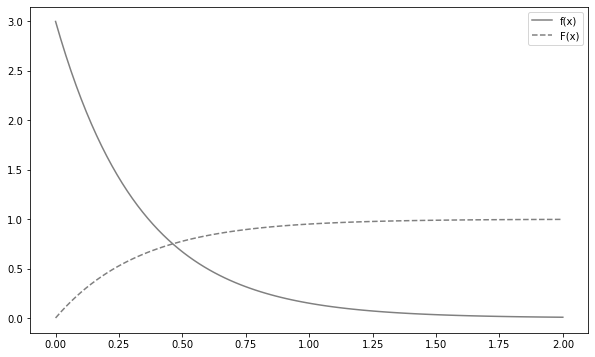

In [24]:
plot_prob(X, 0, 2)

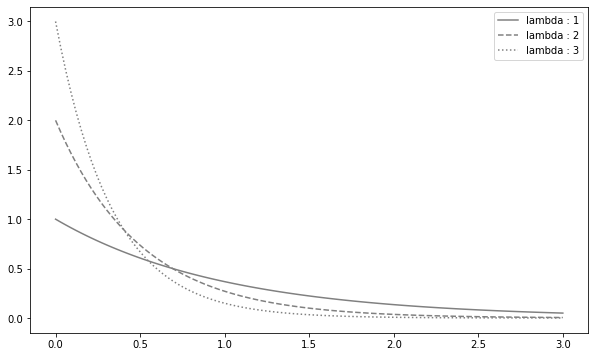

In [25]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale = 1/lam)
    ax.plot(xs, rv.pdf(xs), 
            label = f'lambda : {lam}', ls=ls, color='gray')
ax.legend()
plt.show()

파라미터 값이 점점 커질수록 확률분포는 점점 감소함

3. 카이제곱 분포

In [26]:
n = 10
rv = stats.norm()
sample_size = int(1e6)

# 표준정규분포에서 표본 크기 100만으로 무작위 추출
Xs_sample = rv.rvs((n, sample_size))

# axis=0에서 총합을 구하고, 표준 정규분포의 제곱합 표본 데이터를 구한다.
chi2_sample = np.sum(Xs_sample**2, axis=0)

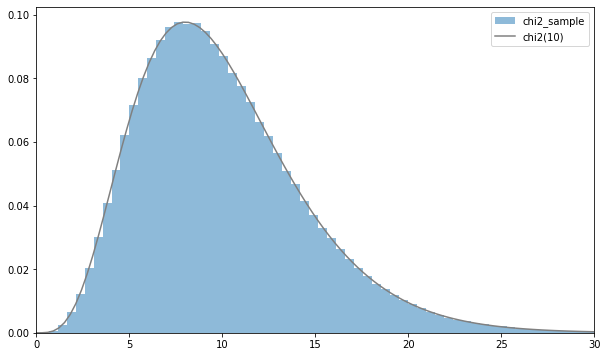

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha = 0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0,30)
plt.show()

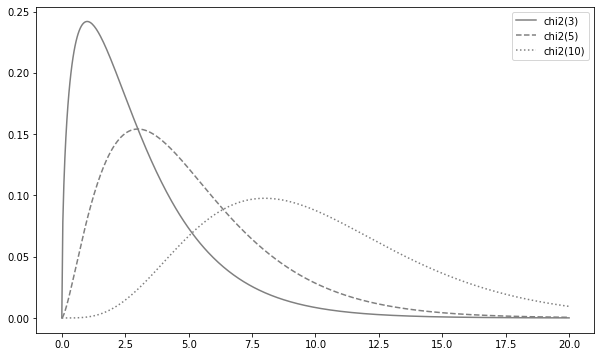

In [28]:
# 자유도에 따른 분포 변화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,20,500)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

카이제곱분포의 특징
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어짐
- 자유도가 커지면 좌우대칭에 가까워짐
- 자유도의 값 가까이에 분포의 정점이 있음

In [29]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070

4. t분포

In [30]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample /n)

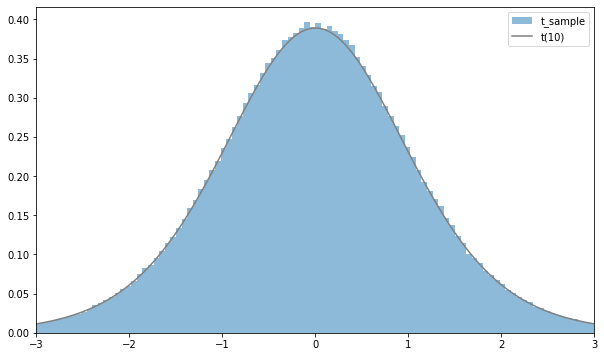

In [32]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range = (-3,3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3,3)
plt.show()

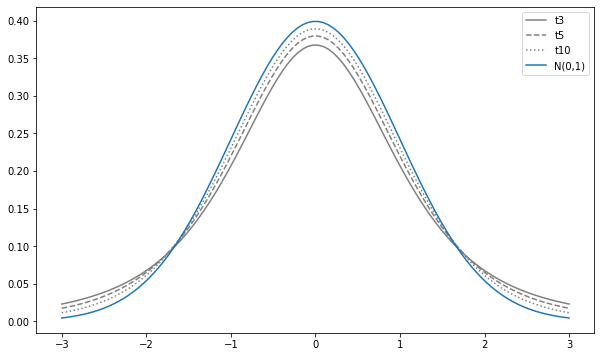

In [34]:
# t분포가 자유도 n에 따라 어떤 분포 형태가 되는 지
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-3,3,100)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't{(n)}', ls=ls, color='gray')

rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label= 'N(0,1)')

ax.legend()
plt.show()

t분포 특징
- 좌우 대칭
- 표준 정규분포보다 양쪽 끝이 두꺼움
- 자유도가 커지면 표준 정규분포에 가까워짐

In [35]:
rv = stats.t(5)
rv.isf(0.05)

2.015

5. F분포

In [38]:
n1 = 5
n2 = 10

rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

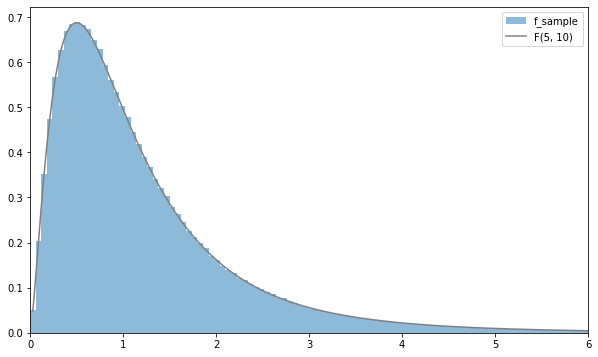

In [39]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0,6,200)[1:]
ax.hist(f_sample, bins=100, range=(0,6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0,6)
plt.show()

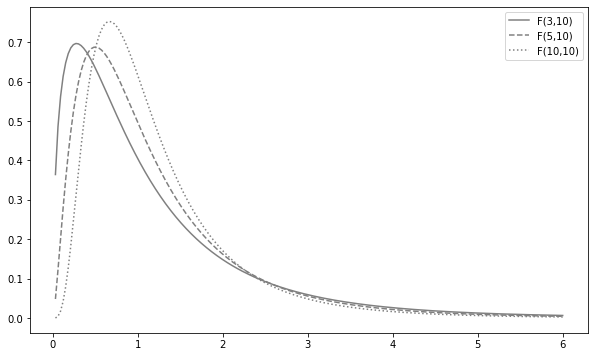

In [40]:
# 자유도에 따라 분포가 어떻게 변하는 지
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,6,200)[1:]
for n1, ls in zip([3,5,10], linestyles):
    rv = stats.f(n1,10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1},10)', ls=ls, color='gray')
    
ax.legend()
plt.show()

F분포 특징
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포
- 분포의 정점은 1에 가까움